<a href="https://colab.research.google.com/github/Akib-Alvee/Communication-Engineering-Lab-CSE-366-Assignment/blob/main/Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$ \textbf{Md Akibul Islam}$$<br>
$$\textbf{Reg. Number: 2017331049}$$

$$ \textbf{A program to simulate the analog-digital signal using Pulse Code Modulation.} $$

**Pulse Code Modulation (PCM)** is the most common technique to change an analog signal to digital data.A PCM encoder has three processes,they are:

   1. The analog signal is sampled.
   2. The sampled signal is quantized.
   3. The quantized values are encoded as streams of bits.<br>
   
We have a following analog signal,$x(t) = Asin(2\pi ft +phase)$ and we will convert this analog signal into digital signal using Pulse Code Modulation.     
 

In [ ]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
'''
A - Amplitude of the signal
f - Frequency of the signal
t - Time variable of the signal
T - Time period of the signal
'''
t = np.linspace(0, 4.0, 100)
def create_sinusoidal(A, f, t, phase = 0):
  x = A * np.sin(2.0 * np.pi * f * t + phase)
  return x

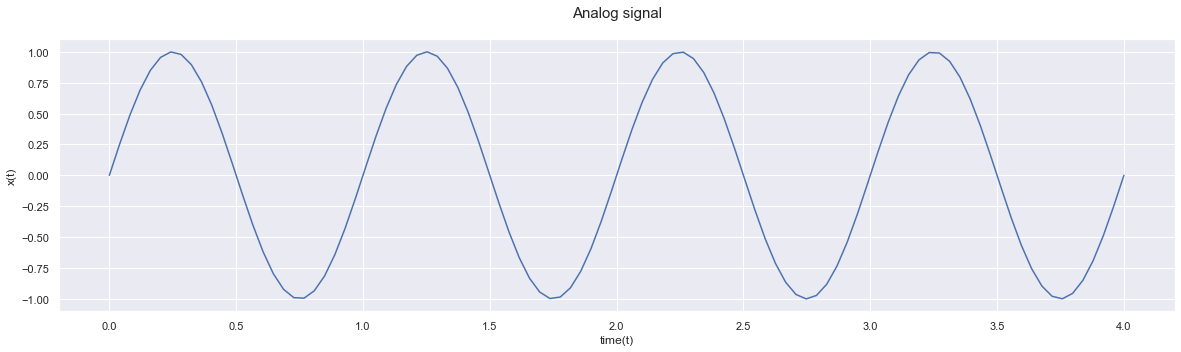

In [ ]:
x_t = create_sinusoidal(1,1,t)
sns.set()
plt.figure(figsize=(20,5))
plt.plot(t,x_t)
plt.title('Analog signal\n', fontsize = 15)
plt.xlabel('time(t)')
plt.ylabel('x(t)')
plt.show()

**Process 01: Sampling**<br>
The analog signal is sampled every $T_s$ s, where $T_s$ is the sample interval or period. The inverse of the sampling interval is called the sampling
rate or sampling frequency and denoted by $f_s$, where $f_s$ = 1/$T_s$.

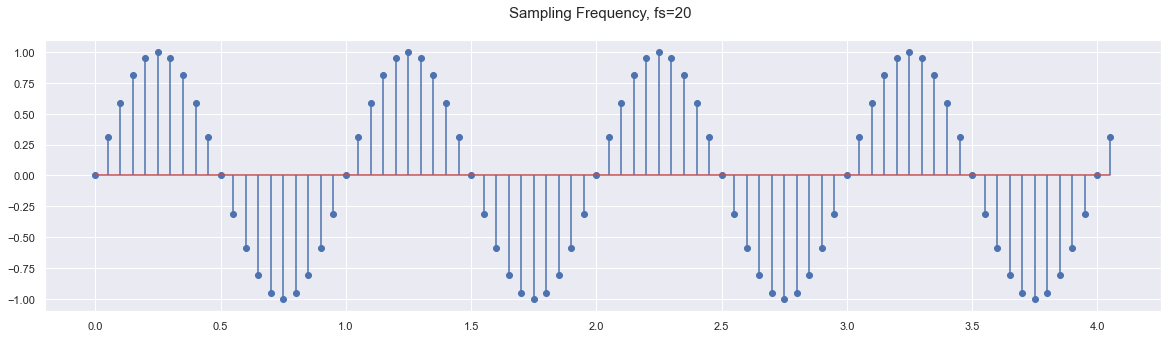

In [ ]:
fs = 20
step = 1.0/fs
n = np.arange(0, 4.1, step)
x_n = create_sinusoidal(1,1,n)
plt.figure(figsize=(20,5))
plt.title('Sampling Frequency, fs=20 \n', fontsize = 15)
plt.stem (n,x_n)
plt.show()

**Process 02: Quantization**<br>
The result of sampling is a series of pulses with amplitude values between the maximum
and minimum amplitudes of the signal. The set of amplitudes can be infinite with
nonintegral values between the two limits. These values cannot be used in the encoding
process.<br><br>
1.Assuming that the original analog signal has instantaneous amplitudes between
$V_{min}$ and $V_{max}$.<br>
2.Dividing the range into L zones, each of height Δ (delta).<br>
$ Δ = \frac{V_{max}-V_{min}}{L}$<br>
3.Assigning quantized values of 0 to L − 1 to the midpoint of each zone.<br>
4.Approximating the value of the sample amplitude to the quantized values.<br>


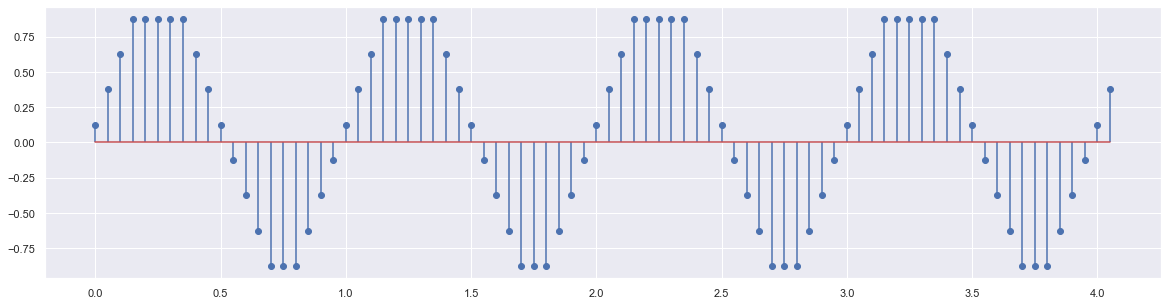

In [ ]:
numberOfBit = 3
level = 2 ** numberOfBit
V_max=1;
V_min=-V_max;
delta=(V_max-V_min)/level;
partition = np.arange(V_min, V_max, delta)
midpoint= np.arange(V_min-(delta/2),V_max+(delta/2), delta) 

# midpoint: [-1.125 -0.875 -0.625 -0.375 -0.125  0.125  0.375  0.625  0.875]
# partition: [-1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75]
# len(x_n)= 82
x_q = np.copy(x_n)
encode = np.copy(x_n)

for i in range(len(partition)):
  upper = midpoint[i]
  lower = midpoint[i + 1]
  for j in range(len(x_n)):
    # upper <= x_n[i] < lower
    if(i != len(partition) - 1 and upper <= x_n[j] and x_n[j] < lower):
      x_q[j] = partition[i]
      encode[j] = i
    # upper <= x_s[i], only for last portion
    if(i == len(partition) - 1 and upper <= x_n[j]):
      x_q[j] = partition[i]
      encode[j] = i

for i in range(len(x_q)):
    x_q[i] = x_q[i] + (delta / 2) 

plt.figure(figsize=(20,5))    
plt.stem(n, x_q)
plt.show()

**Process 03: Encoding**<br> 

The last step in PCM is encoding. After each sample is quantized and the number of bits per sample is decided, each sample can be changed to an $n_b$-bit code word.A quantization code of 2 is
encoded as 010; 5 is encoded as 101; and so on.So the processes for encoding are: <br>
    1.Convert the assigned decimal codec to the binary codec.<br>
    2.Append all the binary codec into an array of 0 and 1.<br>
    3.Plot a step graph.<br>

Encoded Output: 
['100', '101', '110', '111', '111', '111', '111', '111', '110', '101', '100', '011', '010', '001', '000', '000', '000', '001', '010', '011', '100', '101', '110', '111', '111', '111', '111', '111', '110', '101', '100', '011', '010', '001', '000', '000', '000', '001', '010', '011', '100', '101', '110', '111', '111', '111', '111', '111', '110', '101', '100', '011', '010', '001', '000', '000', '000', '001', '010', '011', '100', '101', '110', '111', '111', '111', '111', '111', '110', '101', '100', '011', '010', '001', '000', '000', '000', '001', '010', '011', '100', '101']


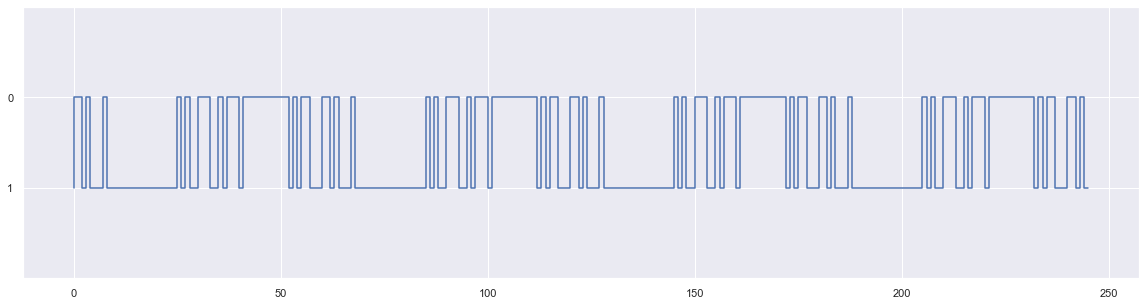

In [ ]:
def decimalToBinary(value, numberOfBit):
    binary = "{0:b}".format(int(value))
    if(len(binary) > numberOfBit):
      return binary
    extraZero = numberOfBit - len(binary)
    return extraZero * "0" + binary

binary_code = []
digital = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], numberOfBit)
  digital.append(binary)
  for j in range(len(binary)):
    binary_code.append(binary[j])
print("Encoded Output: ")
print(digital)
pos = np.arange(len(binary_code))
plt.figure(figsize=(20,5))
plt.ylim(-1, 2)
plt.step(pos, binary_code)
plt.show()